In [1]:
import string
from IPython import display
def print_tags(tokens, attribute, palette='Set2', with_tags=True, return_html=False):
    
    filter_out = ['PUNCT', "", " ", None]
    style = """background: {}; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;"""
    tag_style = """font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; 
                    text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem;"""
    bare_style = """line-height: 2.5; direction: ltr;"""
    if not attribute.endswith('_'):
        attribute+='_'
        #color:{pal[n]}; 
        
    attribs = np.unique([getattr(t, attribute) for t in tokens])
    pal = sns.palettes.color_palette(palette, n_colors=len(attribs)).as_hex()
    
    stng = f'<p style="{bare_style}">'
    for i, token in enumerate(tokens):
        if (str(token) not in string.punctuation) or (i==0):
            stng = stng+ " "
        color = pal[np.where(attribs==getattr(token, attribute))[0][0]]
        
        if with_tags and getattr(token, attribute) not in filter_out:
            stng = stng + f'<text style="{style.format(color)}">'
            stng = stng + f'{token.text} <text style="{tag_style}">{getattr(token, attribute)}' +'</text></text>'
        elif getattr(token, attribute) in filter_out:
            stng = stng + f'<text style="{bare_style}">{token} </text>'
        else:
            stng = stng + f'<text style="{style.format(color)}">{token} </text>'
    if not with_tags:
        
        stng +=f'</p><p style="{bare_style}">LEGEND:</p><p style="{bare_style}">'
        for i, p in enumerate(attribs):
            if p not in filter_out:
                stng = stng + f'<text style="{style.format(pal[i])}">{spacy.explain(p)}: <text style="{tag_style}">{p} </text></text>'
    stng += '</p>'
    if return_html:
        return stng
    else:
        return display.HTML(stng)

class topic:
    def __init__(self, word, perc):
        self.word = word
        self.text = str(word)
        self.perc = perc
        self.perc_ = str(perc)
        
    def __repr__(self):
        return self.word
    
    

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot

jtplot.style(theme='solarizedl')
%matplotlib inline

# Text Mining Part 3 - Advanced models

We've covered:

 - Basics of text analysis (cleaning, tokenizing, RegEx)
 - Vectorizations (tfidf, w2v) and topic modelling

Next are more recent and advanced models:

 - ELMO, BERT

## let's go back

### One hot encoding
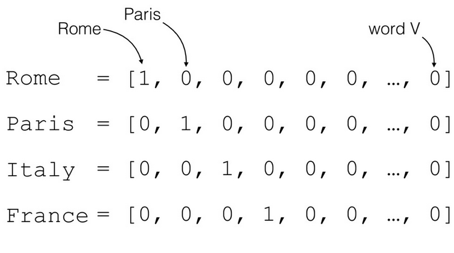

### Word2Vec
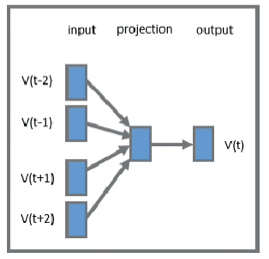

Word2vec is able to represent words in a vector space. The assumption is that the meaning of these words are somehow captured in this vector space.
With enough data, we can see the relationships of these words represented in this space.

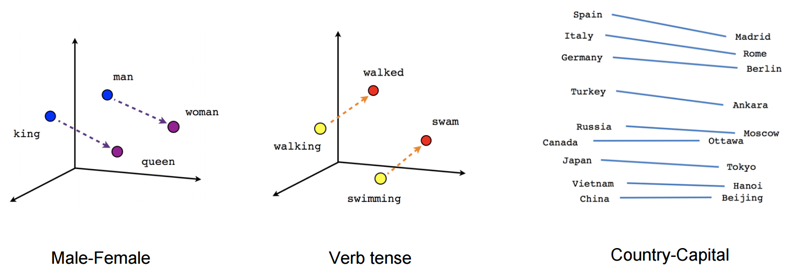

## But, w2v has a downside. 

**It learns to build representatons based on all occurances (examples) of that word**.

In [3]:
sentences = ["We will stick to natural language processing in this class",
             "Bert found a stick in the forest"]

The vector representation of the word 'stick' would in this example be an **average** of the meaning in both of these sentences.

# Example

In [10]:
import spacy
from sklearn.decomposition import PCA
nlp = spacy.load("en_core_web_md")
# This model outputs word-vectors that are not context-aware

In [5]:
words = 'black white red green orange blue purple banana kiwi pear apple juice'
doc = nlp(words)
vectors = [d.vector for d in doc]
X = PCA(2).fit_transform(vectors)
df = pd.DataFrame(X, index=[d.text for d in doc], columns=['x', 'y'])
df.reset_index(inplace=True)

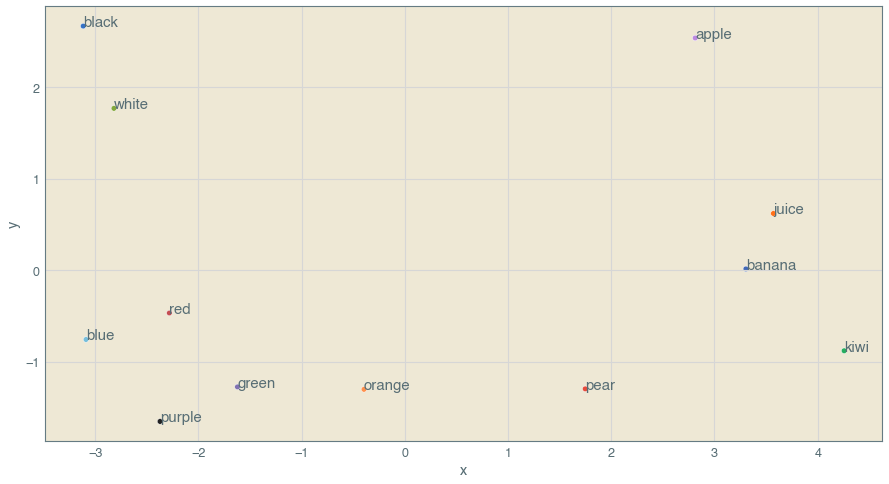

In [6]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df, x='x', y='y', hue='index', legend=None)
for row in df.itertuples():
    plt.annotate(row.index, (row.x, row.y), fontsize=15)

## Contextualized word embeddings

Contextualized word embeddings are, as the name suggest, made to create a word embedding that takes the context into account. These embeddings are also known as Context Vectors, or CoVe.

The 'original' CoVe model (as presented in the paper <a href='https://arxiv.org/pdf/1708.00107.pdf'> Learned in Translation: Contextualized Word Vectors</a>) are based on a machine translation task using sequence models.

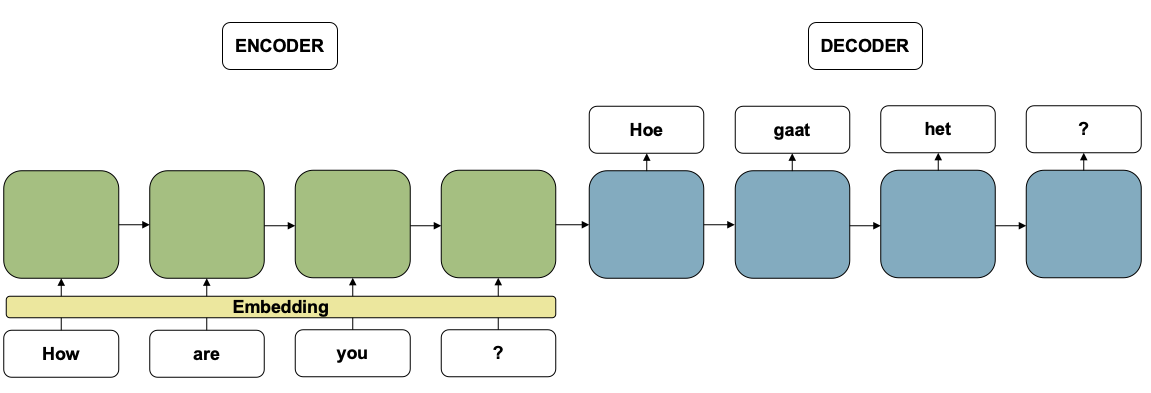

A model is trained to translate different sentences to another language, with non-contextualized word embeddings as input (e.g. W2V). 

The encoder a hidden layer, that throught his training learn embeddings for the words based on what came before (the context of a sentence). 

This hidden layer can be used as a new embedding, that is context aware.

## Example

In [7]:
sentences

['We will stick to natural language processing in this class',
 'Bert found a stick in the forest']

In [8]:

context_aware = spacy.load("en_core_web_sm")
non_context = spacy.load("en_core_web_md")

text = ' '.join(sentences).lower()

cove = context_aware(text)
no_cove = non_context(text)

vec_cove = [d.vector for d in cove]
X = PCA(2).fit_transform(vec_cove)
df1 = pd.DataFrame(X, index=[d.text for d in cove], columns=['x', 'y'])
df1.reset_index(inplace=True)

vec = [d.vector for d in no_cove]
X = PCA(2).fit_transform(vec) 
df2 = pd.DataFrame(X, index=[d.text for d in no_cove], columns=['x', 'y'])
df2.reset_index(inplace=True)

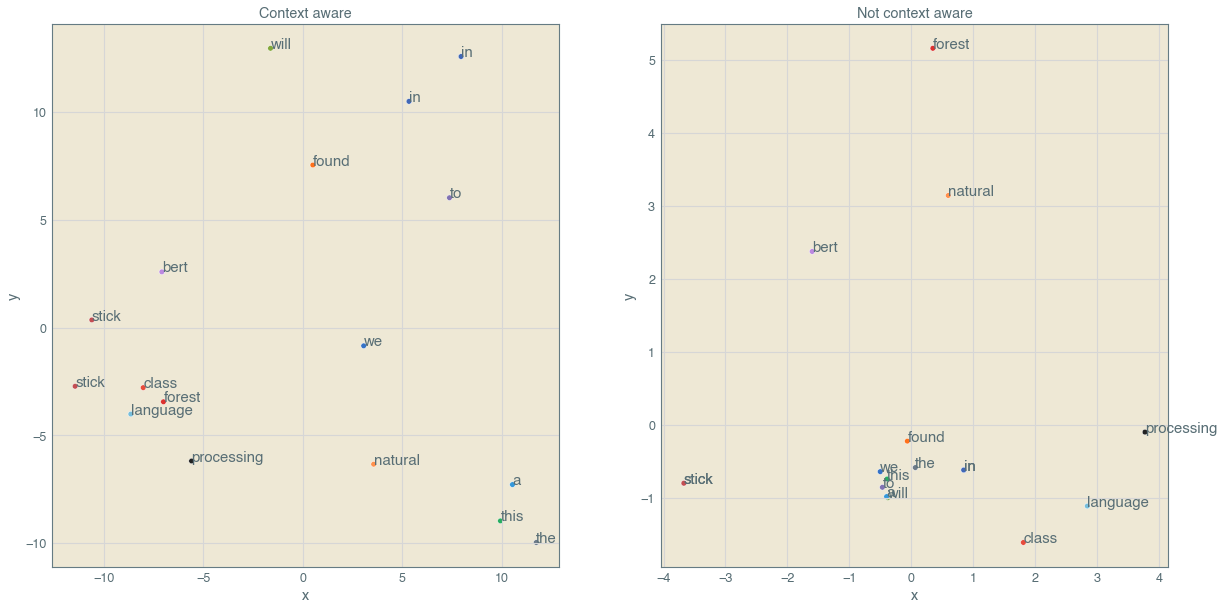

In [11]:
plt.figure(figsize=(20,10)); plt.subplot(121)
plt.title("Context aware")
sns.scatterplot(data=df1, x='x', y='y', hue='index', legend=None)
for row in df1.itertuples():
    plt.annotate(row.index, (row.x, row.y), fontsize=15)
plt.subplot(122); plt.title("Not context aware")
sns.scatterplot(data=df2, x='x', y='y', hue='index', legend=None)
for row in df2.itertuples():
    plt.annotate(row.index, (row.x, row.y), fontsize=15)

# Language Modelling

Language modelling tries to generate text, by predicting the next word in a sentence. The embeddings generated from these models can also be used as context vectors.

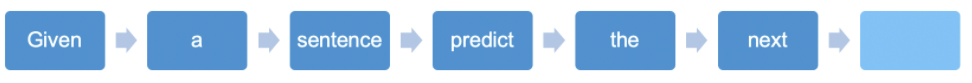

Now the word 'bank' in a sentence like 'He walked down to the river bank' will have a vector that takes into account that the word 'river' came before it.

But when we look at the sentence "He made a bank deposit", the most context giving words are after the word bank. So we also need to go the other way:
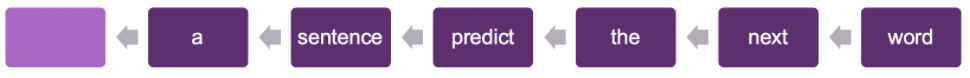

This is what models like ELMo (Embeddings from Language Models) tries to do.
<img src='http://jalammar.github.io/images/elmo-forward-backward-language-model-embedding.png'>
<a href='https://www.slideshare.net/shuntaroy/a-review-of-deep-contextualized-word-representations-peters-2018'>source</a>

<img src='http://jalammar.github.io/images/elmo-embedding.png'>
<a href='https://www.slideshare.net/shuntaroy/a-review-of-deep-contextualized-word-representations-peters-2018'>source</a>

# Transfer learning

Contextualizerd word embeddings provide great input for other NLP tasks (like classifcation) as we saw before.

Problem with using embeddings for any task, is that sometimes the embeddings are not suitable for the task we want to perform.

The problem with general word embeddings it that they might nog behave as we expect on a different domain.

An model (one that outputs vectors for us to use) that has been trained on a lot of news articles might be a good basis for a **Fake news classifier**, but it might not work in other domains, like medicine or financial.

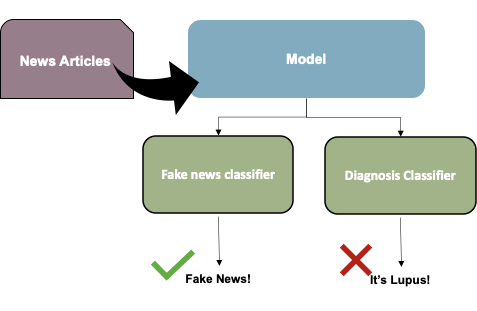

## We can try to train a new model on our own data

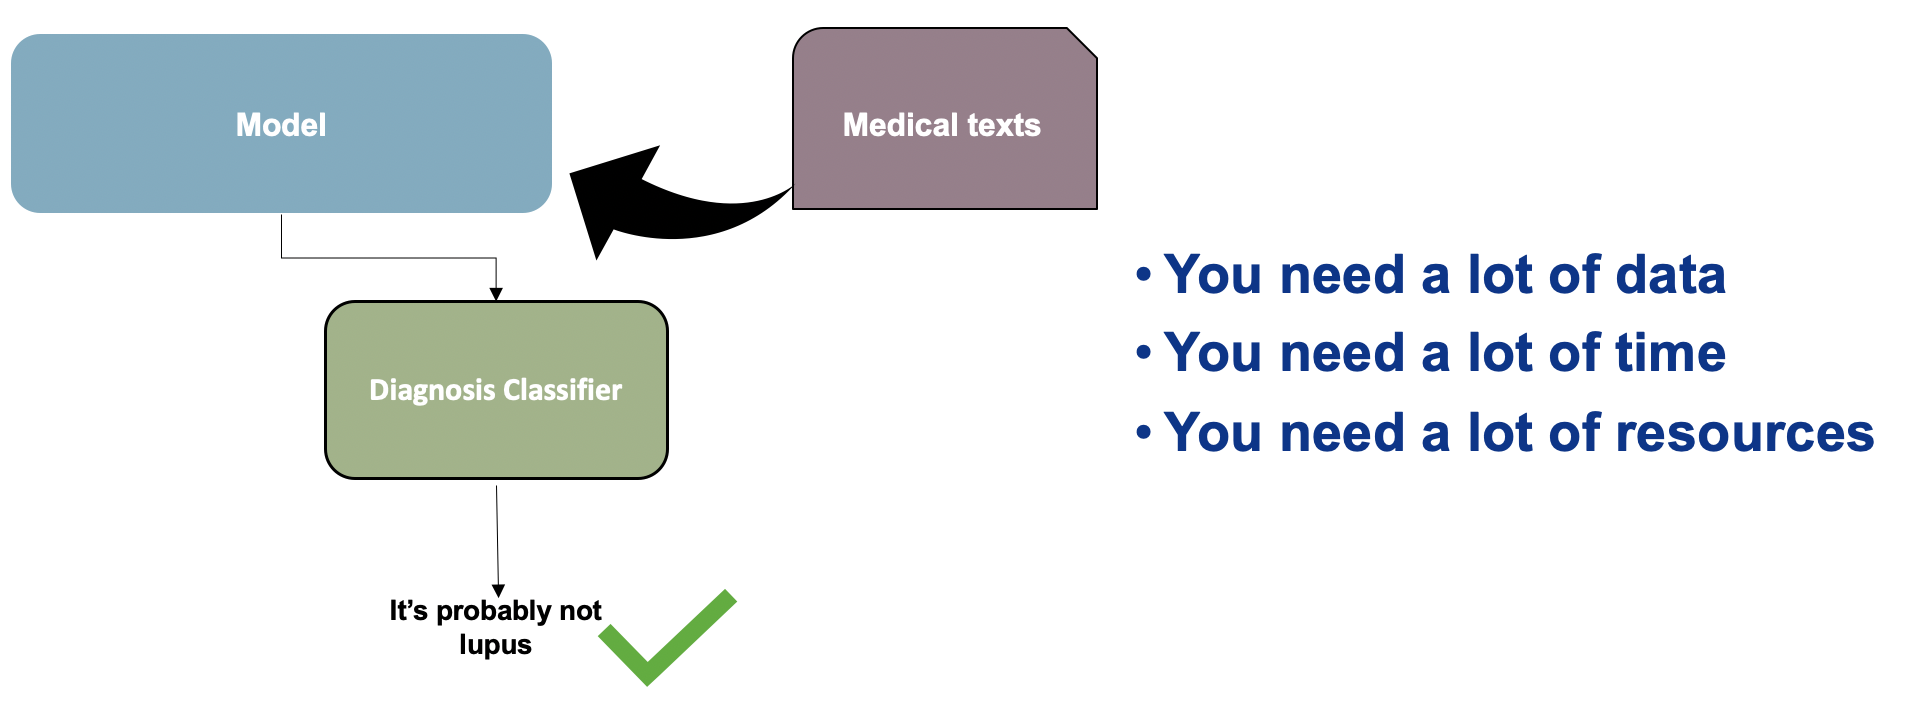

### LSTM vs Transformer

LSTM stands for **Long Short Term Memory**. They were the building blocks of NLP models (such as ELMo) that were able to update the model based on new examples (short-term) without losing information about samples it had in the beginning of training (long-term).

Downside of LSTM's was mainly the speed, as it can take a long time to train them.

#### The transformer

<img src='http://jalammar.github.io/images/t/The_transformer_encoder_decoder_stack.png'>

A **transformer** is a combination of an encoder and decoder (we saw this before).

It was made specifically for **machine translation** in mind, it's also a sequence model.

The encoder **transforms the input sentence to some embedding**, and the **decoder translates this embedding to the output**: the translated sentence.

The secret to the transformer, is what is happening inside the encoders: so called **self-attention**.

## Self attention

Self-attention, or just attention, is often referenced in NLP literature. It refers to the method an encoder/decoder structure uses to **obtain information about how words inside a sentence relate to each other**.

For example, in the sentence `"The chicken didn't cross the road because it was too tired"`, what does `'it'` refer to?



Obbviously `it` refers to `the Chicken`.

But for a model this might not be so obvious. So that is where attention comes in.

**Attention allows the model to look at the other words when it is processing each word in the sentence.**


As the model trains or more samples (translates more sentences) it starts to build up better encodings of the word using the other words in the sentence of the input.

**It creates Context Aware Embeddings of the words** 

So transformers:
    
- Are faster to train than LSTMs
- Can be used in language modelling (no need for labels)
- Build **Contextualised Word Embeddings**
- Can be used for transfer learning

However, they only make embeddings in one direction, so we lose some of the benefits from ELMo.

# Bidirectional Encoder Representations from Transformers

<img src='https://s3.amazonaws.com/images.seroundtable.com/google-bert-algorithm-update-1572000459.jpg'>

The BERT model was released by google in late 2018 and has since has countless variations. Similar to ELMo, it is trained on large amounts of using language modelling.

The advantage of BERT is that it:

- Uses **Transformers** instead of LSTMs
- Can be used for **transfer learning** for a number of NLP tasks
- Creates embeddings that are **bidirectional**

<img src='http://jalammar.github.io/images/BERT-language-modeling-masked-lm.png'>
Source: <a href='http://jalammar.github.io/illustrated-bert/'>http://jalammar.github.io/illustrated-bert/</a>

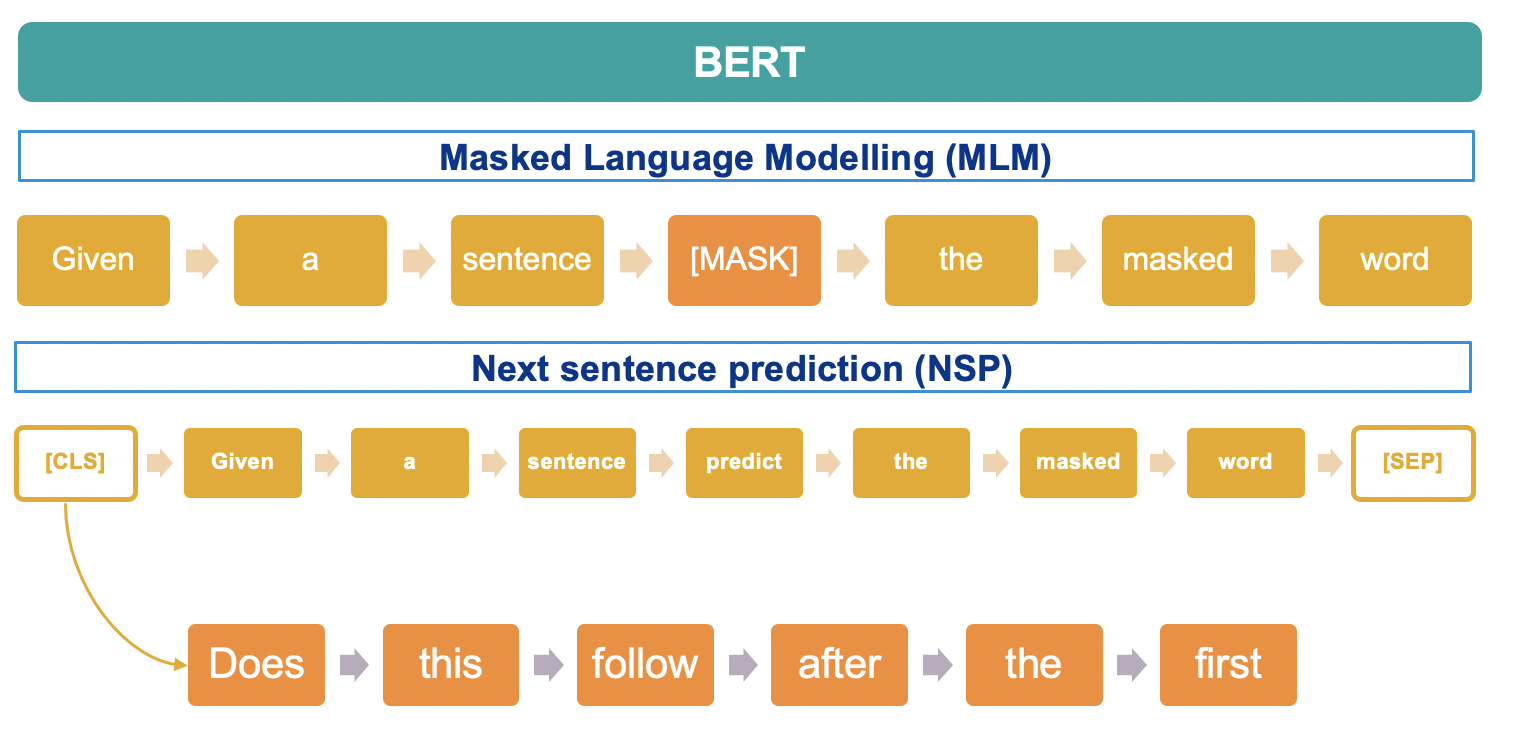

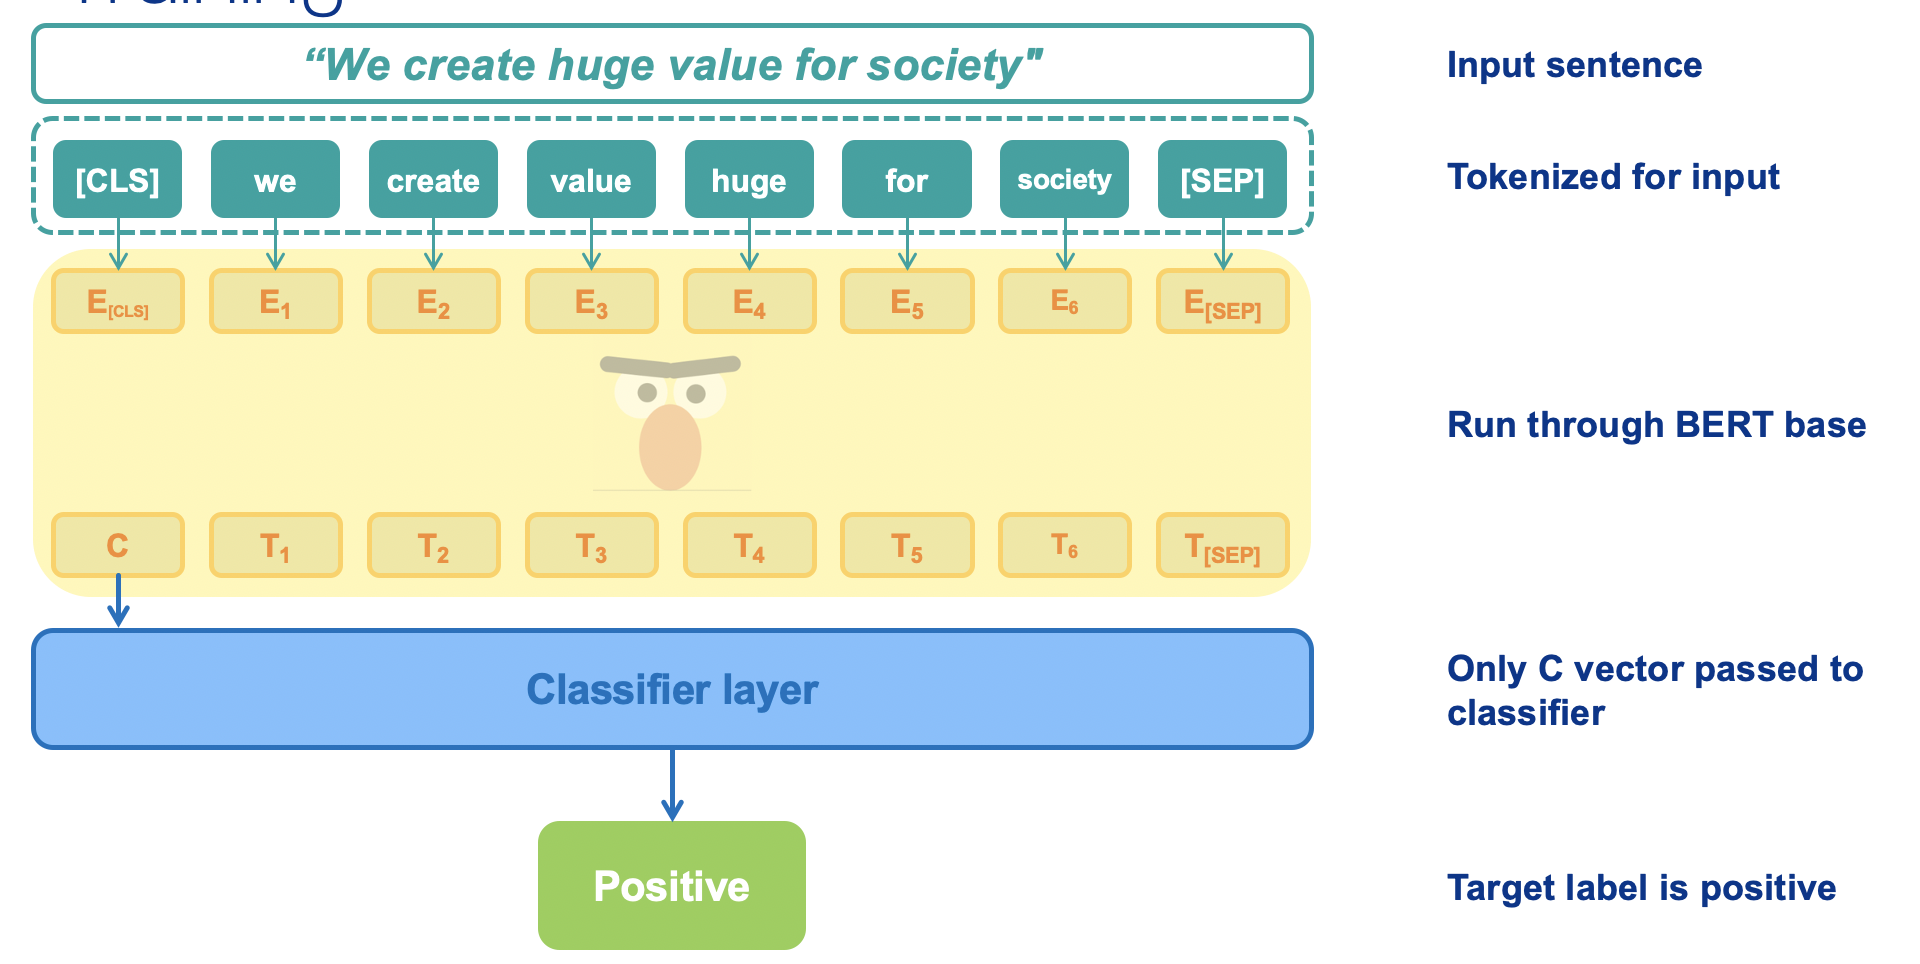

# Let's train BERT

Go to this link:
    https://colab.research.google.com/github/Arsilla/TextMining_Tias/blob/main/NLP_Class.ipynb

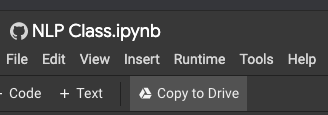
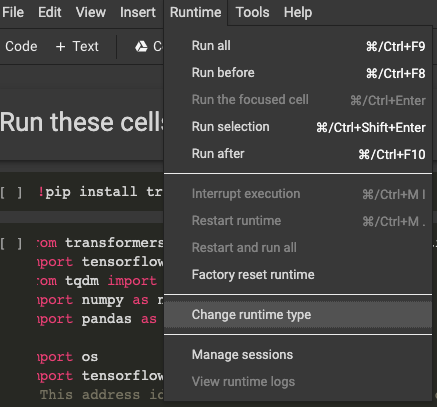

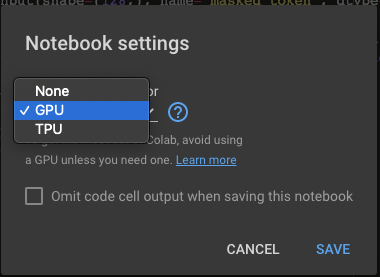